# <font color = green>Image Classification using Convolution Nural Network(CNN)</font>


### <font color = orange>click below link to redirect to the perticular Article</font>

1. [Importing the Package](#Importing-the-Package)
2. [Segritation the Data for the training and validation](#Segritation-the-Data-for-the-training-and-validation)
3. [Normalizing and Applying the filters](#Normalizing-and-Applying-the-filters)
4. [compling the Model](#compling-the-Model)
    
5. [Image Argumentation](#Image-Argumentation)
6. [Labling the Data](#Labling-the-Data)
7. [Visulazing the Data](#Visulazing-the-Data)
8. [Training the Model](#Training-the-Model)
9. [Visulazing the Training process](#Visulazing-the-Training-process)
10. [Let's See the Testing Data](#Let's-See-the-Testing-Data)

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


### Importing the Package

In [38]:
# Code source : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# Image Source: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs 
# Direct Image Source: https://www.microsoft.com/en-us/download/details.aspx?id=54765
#import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import backend as k
import numpy as np
from os import listdir
from os.path import isfile, join
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

import time

In [23]:
NAME = "Cats-vs-dog-cnn-64X2-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

### <font color = brown>Segritation the Data for the training and validation</font>

In [101]:
img_width = 256
img_height = 256

train_data_dir = r'image_data/training'
validation_data_dir = r'image_data/validation'
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 20

# Check for TensorFlow or Thieno
#tf.keras.set
if k.image_data_format() == 'channels_first':
    #print("Test")
    input_shape = (3, img_width, img_height)
else:
    #print("Test1")
    input_shape = (img_width, img_height, 3)

### <font color = brown>Normalizing and Applying the filters</font>

In [102]:
visible = tf.keras.layers.Input(shape=input_shape)
conv1 = tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(visible)
conv2 = tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv1)
bat1 = tf.keras.layers.BatchNormalization()(conv2)
zero1 = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(bat1)

conv3 = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.05))(zero1)
conv4 = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.05))(conv3)
bat2 = tf.keras.layers.BatchNormalization()(conv4)

conv5 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(bat2)
conv6 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(conv5)
bat3 = tf.keras.layers.BatchNormalization()(conv6)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(bat3)
zero2 = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(pool1)

conv7 = tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.01))(zero2)
conv8 = tf.keras.layers.Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv7)
bat4 = tf.keras.layers.BatchNormalization()(conv8)

conv9 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(bat4)
conv10 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(conv9)
bat5 = tf.keras.layers.BatchNormalization()(conv10)

conv11 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1, 1))(bat5)
conv12 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv11)
bat6 = tf.keras.layers.BatchNormalization()(conv12)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(bat6)

conv13 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(pool2)
conv14 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(conv13)
bat7 = tf.keras.layers.BatchNormalization()(conv14)

conv15 = tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.05))(bat7)
conv16 = tf.keras.layers.Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv15)
bat8 = tf.keras.layers.BatchNormalization()(conv16)

flat = tf.keras.layers.Flatten()(bat8)
hidden1 = tf.keras.layers.Dense(32, activation='relu')(flat)
drop1 = tf.keras.layers.Dropout(0.3)(hidden1)

hidden2 = tf.keras.layers.Dense(32, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.2)(hidden2)

output = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)
model = tf.keras.models.Model(inputs=visible, outputs=output)


In [103]:
opt = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer= opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [104]:
Callbacks=[EarlyStopping(patience=3, restore_best_weights=True), 
           ReduceLROnPlateau(patience=2), 
           ModelCheckpoint(filepath='ImageDataGen_Size256_oneHOT_ClassWeights_Callbacks_SGD_L2.h5', save_best_only=True)]    

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 252, 252, 16)      2320      
_________________________________________________________________
batch_normalization_60 (Batc (None, 252, 252, 16)      64        
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 254, 254, 16)      0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 252, 252, 32)      4640      
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 250, 250, 32)      9248

In [25]:
model = tf.keras.models.Sequential()
#model.add(prior)
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows sizea
model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(32, kernel_size= (3, 3), activation='relu'))
#model.add(Activation('relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, kernel_size= (3, 3), activation='relu'))
#model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu'))
#model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu'))
#model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(tf.keras.layers.Dense(64,activation='relu'))
#model.add(Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
#model.add(Activation('sigmoid'))

## <font color = brown>compling the Model</font>

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])  #categorical_crossentropy

In [105]:
# Data Augmentation is a method of artificially creating a new dataset for training from 
# the existing training dataset to improve the performance of deep learning neural network 
# with the amount of data available. It is a form of regularization which makes our model generalize better 
# than before.

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

## <font color = brown>Image Argumentation</font>

In [106]:
# this is the augmentation configuration we will use for testing:
# only rescaling, avoiding having same training and validation data.Ma
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

In [107]:
train_generator = train_datagen.flow_from_directory(   ##binary categorical
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',)

Found 165 images belonging to 2 classes.


In [108]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 20 images belonging to 2 classes.


## <font color = brown>Labling the Data</font>

In [109]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [110]:
imgs, labels = next(train_generator)

In [111]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

## <font color = brown>Visulazing the Data</font>

20
1.0


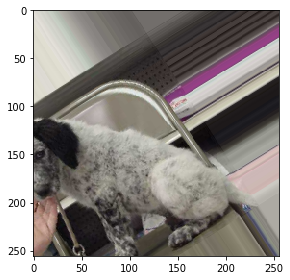

1.0


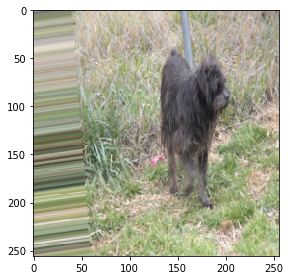

0.0


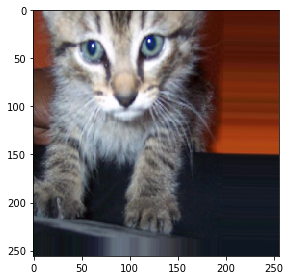

1.0


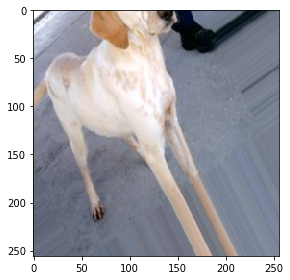

0.0


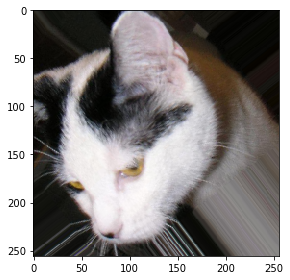

1.0


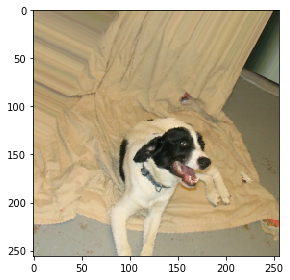

0.0


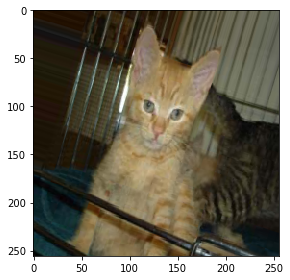

1.0


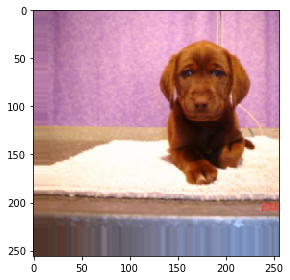

1.0


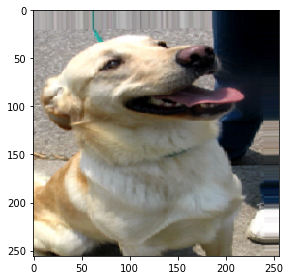

1.0


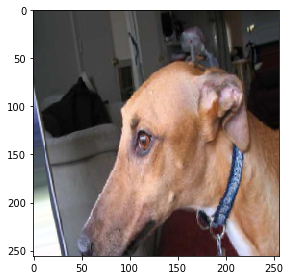

1.0


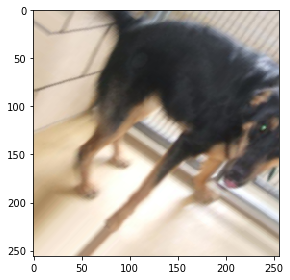

0.0


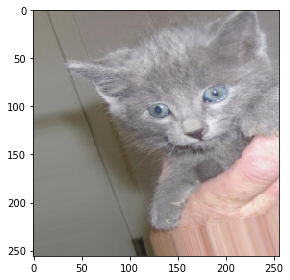

0.0


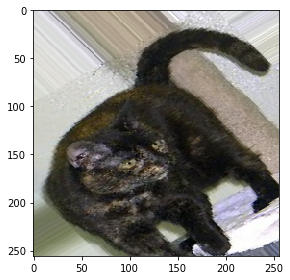

1.0


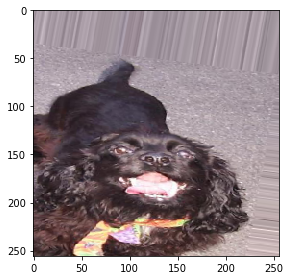

1.0


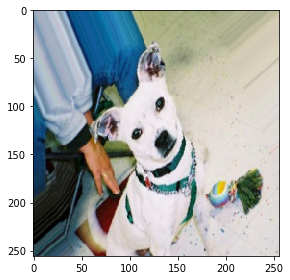

1.0


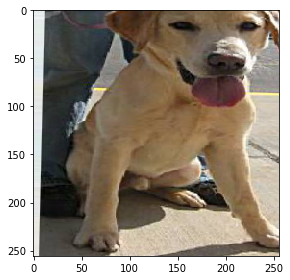

1.0


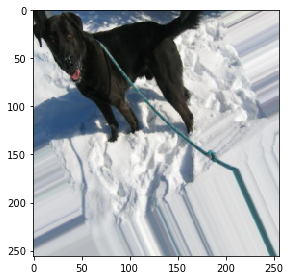

1.0


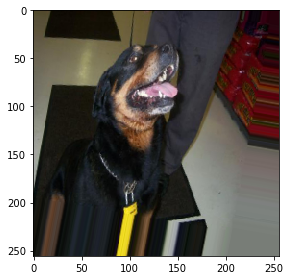

1.0


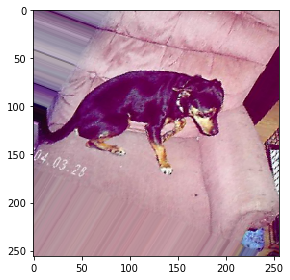

0.0


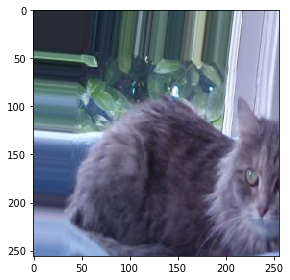

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

## <font color = brown>Training the Model</font>

In [113]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 100 images belonging to 2 classes.


In [114]:
with tf.device('/device:GPU:0'): 
    history= model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples//batch_size,
        epochs=3,
        validation_data=validation_generator,
        validation_steps=validation_samples//batch_size,
        callbacks=Callbacks,
        verbose=1)

Epoch 1/3
6/6 [==============================] - 59s 10s/step - loss: 17.4734 - accuracy: 0.5333 - val_loss: 31401.8965 - val_accuracy: 0.4500 - lr: 0.0100
Epoch 2/3
6/6 [==============================] - 62s 10s/step - loss: 26.4177 - accuracy: 0.4952 - val_loss: 6883868.0000 - val_accuracy: 0.4500 - lr: 0.0100
Epoch 3/3
6/6 [==============================] - 54s 9s/step - loss: 27.0504 - accuracy: 0.5143 - val_loss: 680699.7500 - val_accuracy: 0.4500 - lr: 0.0100


In [100]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples//batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_samples//batch_size,
    callbacks=Callbacks,
    verbose=1)

Epoch 1/5
3/3 [==============================] - ETA: 0s - loss: 14.9298 - accuracy: 0.5000

UnboundLocalError: local variable 'logs' referenced before assignment

## <font color = brown>Visulazing the Training process</font>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


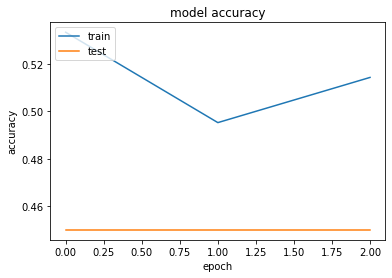

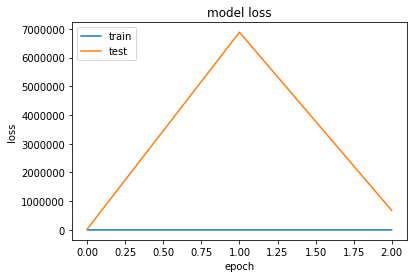

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## <font color = brown>Let's See the Testing Data</font>

In [116]:

## Now Predict
predict_dir_path=r'image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['310.jpg', '2994.jpg', '3285.jpg', '236.jpg', '234.jpg', '3111.jpg', '2512.jpg', '2658.jpg']


## <font color = brown>Classify the unknown data</font>

In [118]:
# predicting images
#from tf.keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = tf.keras.preprocessing.image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

310.jpg: dog
2994.jpg: dog
3285.jpg: dog
236.jpg: dog
234.jpg: dog
3111.jpg: dog
2512.jpg: dog
2658.jpg: dog
Total Dogs : 8
Total Cats : 0


# predicting images
#from tf.keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = tf.keras.preprocessing.image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)